In [212]:
import matplotlib
import numpy as np
from scipy import stats
# matplotlib.use("macosx")
import matplotlib.pyplot as plt

In [251]:
#f = open("/Users/jeff/Research/Simcore/diffusion_len_10_2d.log",'r')
#f = open("/Users/jeff/Research/Simcore/diffusion_len_10_2d_2.log",'r')
f = open("/Users/jeff/simcore/diffusion2d-r5-diffusion.log")
line = f.readline()
line=line.split()
nFilaments=len(line)-1
time=[]
dat=[]
for i in xrange(nFilaments):
    dat.append([])
for line in f:
    line=line.split()
    time.append(float(line[0])*.001) # multiply times delta to get simtime
    for i in xrange(nFilaments):
        dat[i].append(float(line[i+1]))
f.close()


0.855665220292
0.115790916998
0.0512750658566


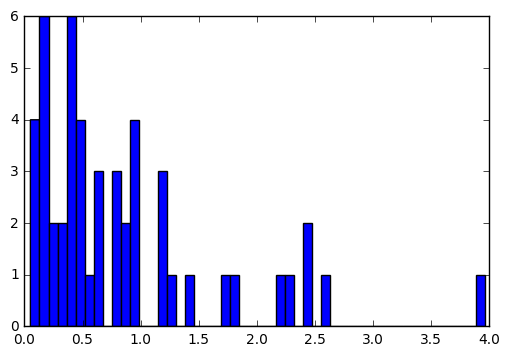

theory: 0.0103616329185


In [256]:
avgDiff=0
length=10
means=[]
sems=[]
for n in xrange(nFilaments):
    diff=[]
    for i in xrange(1,len(dat[n])):
        diff.append(np.square(dat[n][i]-dat[n][0]))
    meanDiff=np.mean(diff)
    stdDiff=np.std(diff, ddof=1)
    means.append(meanDiff)
    sems.append(stdDiff)
print np.mean(means)
print stats.sem(means)
print stats.mode(means)[0][0]
plt.hist(means,bins=50)
plt.show()
dRot=9.0*np.log(length)/(length)**3
t=0.25
print "theory: " + str(2*t*dRot)